**Data Preprocessing**

In [6]:
import pandas as pd
import math
import warnings

In [7]:
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health (1).csv


In [9]:
df = pd.read_csv('/content/fetal_health.csv')

In [10]:
#df.head()
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [11]:
df.shape

(2126, 22)

In [12]:
df.info

<bound method DataFrame.info of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              

In [13]:
missing_data = df.isna().sum()
print(missing_data)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [14]:
#Calculate mean value of a feature
mean_value = df['fetal_movement'].mean()
print(round(mean_value,1), math.ceil(mean_value))

# Calculate the mean value of the specified feature, excluding 0.0
mean_value = df[df['fetal_movement'] != 0.0]['fetal_movement'].mean()
print(round(mean_value,1), math.ceil(mean_value))

# Calculate the mean value of the specified feature, excluding 0.0 and NaN
mean_value = df[(df['fetal_movement'] != 0.0) & (~df['fetal_movement'].isna())]['fetal_movement'].mean()
print(round(mean_value,1), math.ceil(mean_value))

0.0 1
0.0 1
0.0 1


In [15]:
# Replace NaN values in a specific feature with the mean of that feature
df['fetal_movement'].fillna(math.ceil(mean_value), inplace=True)
print(round(mean_value,1), math.ceil(mean_value))

0.0 1


<ipython-input-15-f54d8bb4146c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fetal_movement'].fillna(math.ceil(mean_value), inplace=True)


In [17]:
# Calculate and display the minimum and maximum values for each feature (column)
min_max_values = df.aggregate(['min', 'max'])
print("Minimum and Maximum Values for Each Feature:")
print(min_max_values)

Minimum and Maximum Values for Each Feature:
     baseline value  accelerations  fetal_movement  uterine_contractions  \
min           106.0          0.000           0.000                 0.000   
max           160.0          0.019           0.481                 0.015   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
min                0.000                 0.000                     0.000   
max                0.015                 0.001                     0.005   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
min                             12.0                                   0.2   
max                             87.0                                   7.0   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
min                                                0.0       ...   
max                                               91.0       ...   

     histogram_min  histogram_max  histogram_number_of_pe

In [18]:
# Replace all values in the specified feature with 1 except for 0
df.loc[df['histogram_tendency'] != 0, 'histogram_tendency'] = 1
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [19]:
# Save the updated DataFrame back to a CSV file
df.to_csv('/content/fetal_health (1).csv.csv',index=False)

In [20]:
# Download the file to your local PC
files.download('/content/fetal_health (1).csv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Step ii: Unsupervised Learning Techniques**

In [21]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Validate clusters using silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.35409681192229325


# **Step iii: Feature Selection**

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection with f_classif, which can handle continuous data with negative values
selector = SelectKBest(f_classif, k=5)  # Adjust k based on your needs
X_selected = selector.fit_transform(X_scaled, y)
print("Selected features shape:", X_selected.shape)


Selected features shape: (2126, 5)


# **Step iv: Supervised Learning Classifiers**

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/fetal_health (1).csv')

# Separate features and target
X = data.drop('fetal_health', axis=1)  # Replace 'fetal_health' with actual target column name if different
y = data['fetal_health']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using f_classif to handle continuous data
selector = SelectKBest(f_classif, k=5)  # Choose k based on desired number of features
X_selected = selector.fit_transform(X_scaled, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),  # Added max_iter for convergence
    'SVC': SVC()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = [accuracy, precision, recall, f1]
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


RandomForest - Accuracy: 0.9484, Precision: 0.9482, Recall: 0.9484, F1-score: 0.9469
Confusion Matrix:
 [[328   3   2]
 [ 12  49   3]
 [  1   1  27]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.92      0.77      0.84        64
         3.0       0.84      0.93      0.89        29

    accuracy                           0.95       426
   macro avg       0.91      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426

GradientBoosting - Accuracy: 0.9319, Precision: 0.9313, Recall: 0.9319, F1-score: 0.9298
Confusion Matrix:
 [[324   5   4]
 [ 17  46   1]
 [  2   0  27]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.90      0.72      0.80        64
         3.0       0.84      0.93      0.89        29

    accuracy                           0.93      

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


LogisticRegression - Accuracy: 0.8615, Precision: 0.8529, Recall: 0.8615, F1-score: 0.8548
Confusion Matrix:
 [[317  10   6]
 [ 27  31   6]
 [  4   6  19]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       333
         2.0       0.66      0.48      0.56        64
         3.0       0.61      0.66      0.63        29

    accuracy                           0.86       426
   macro avg       0.73      0.70      0.71       426
weighted avg       0.85      0.86      0.85       426

SVC - Accuracy: 0.9085, Precision: 0.9067, Recall: 0.9085, F1-score: 0.9043
Confusion Matrix:
 [[325   8   0]
 [ 22  42   0]
 [  5   4  20]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       333
         2.0       0.78      0.66      0.71        64
         3.0       1.00      0.69      0.82        29

    accuracy                           0.91       426
  

# **Step v: Illustrating Results**

                    Accuracy  Precision    Recall  F1-score
RandomForest        0.948357   0.948224  0.948357  0.946915
GradientBoosting    0.931925   0.931334  0.931925  0.929763
AdaBoost            0.870892   0.875651  0.870892  0.870123
LogisticRegression  0.861502   0.852871  0.861502  0.854770
SVC                 0.908451   0.906655  0.908451  0.904268


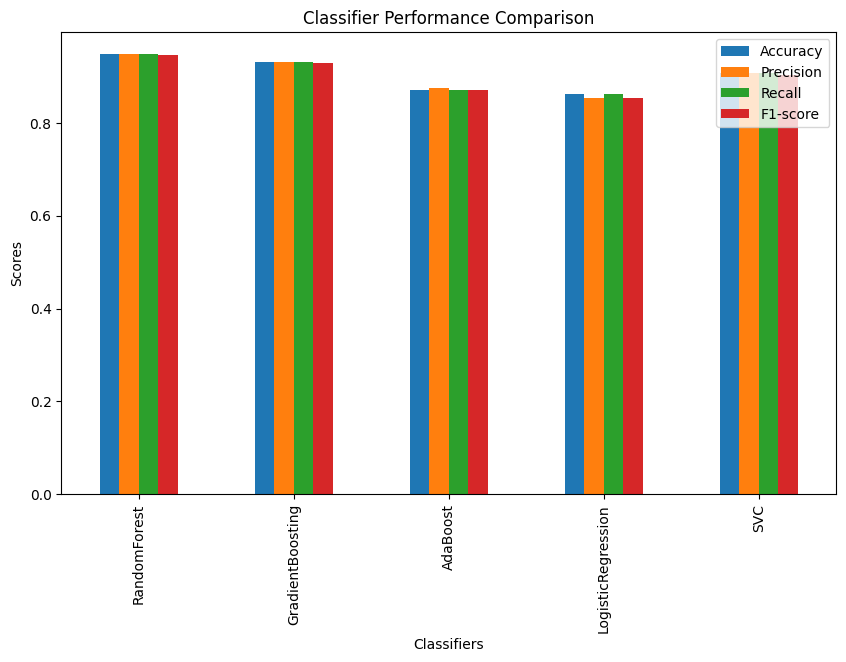

In [41]:
# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T
print(results_df)

# Plotting results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Classifier Performance Comparison")
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.show()

# **Step vii: Automated Feature Extraction**

**Step 1: Load and Prepare the Dataset**

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Apply Manual Feature Engineering Techniques**

In [43]:
# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Check the shape of the new feature set
print("Original features shape:", X_train.shape)
print("Expanded features shape:", X_train_poly.shape)

Original features shape: (120, 4)
Expanded features shape: (120, 14)


**Step 3: Apply a Classification Technique**

In [44]:
# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with manual feature engineering: {accuracy * 100:.2f}%")


Accuracy with manual feature engineering: 100.00%


# **Step vii: Automated Feature Extraction**

**Step 1: Load and Prepare the Dataset**

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Step 2: Apply PCA for Automated Feature Extraction**

In [46]:
from sklearn.decomposition import PCA

# Initialize PCA and fit it to the data
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Check the transformed shape
print("Original shape:", X_scaled.shape)
print("PCA reduced shape:", X_pca.shape)

Original shape: (150, 4)
PCA reduced shape: (150, 2)


**Step 3: Apply Autoencoders for Feature Extraction**



In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define Autoencoder architecture
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Number of features to extract

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model for extracting features
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=10, shuffle=True)

# Extract features using the encoder
X_autoencoded = encoder.predict(X_scaled)

# Check the new shape after feature extraction
print("Autoencoder reduced shape:", X_autoencoded.shape)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2596   
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2109  
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2212 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2328 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1458 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1335 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0265 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1524 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0820 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1540 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0362 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2146 
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1546 
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1233 
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0562 
E

**Step 4: Evaluation Using a Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate on PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train, y_train)
y_pred_pca = clf_pca.predict(X_test)
print("Accuracy with PCA features:", accuracy_score(y_test, y_pred_pca))

# Train and evaluate on Autoencoder features
X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)
clf_autoencoder = RandomForestClassifier(random_state=42)
clf_autoencoder.fit(X_train, y_train)
y_pred_autoencoder = clf_autoencoder.predict(X_test)
print("Accuracy with Autoencoder features:", accuracy_score(y_test, y_pred_autoencoder))

Accuracy with PCA features: 0.9
Accuracy with Autoencoder features: 0.9666666666666667
